### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Load Dataset
me-load data train dan test

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


In [5]:
df = df_train.drop(['id'], axis=1)

### Eksplorasi dan Persiapan Data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                463 non-null    object 
 1   radius_mean              463 non-null    float64
 2   texture_mean             463 non-null    float64
 3   perimeter_mean           463 non-null    float64
 4   area_mean                463 non-null    float64
 5   smoothness_mean          463 non-null    float64
 6   compactness_mean         463 non-null    float64
 7   concavity_mean           463 non-null    object 
 8   concave points_mean      463 non-null    object 
 9   symmetry_mean            463 non-null    float64
 10  fractal_dimension_mean   463 non-null    float64
 11  radius_se                463 non-null    float64
 12  texture_se               463 non-null    float64
 13  perimeter_se             463 non-null    float64
 14  area_se                  4

Membersihkan data, mencari data yang memiliki missing value

In [7]:
df.columns[df.isin(["?"]).any()]

Index(['concavity_mean', 'concave points_mean', 'concavity_se',
       'concave points_se', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Mengganti missing value '?' menjadi NaN agar bisa dihapus fiturnya nanti

In [8]:
df = df.replace('?',np.nan)

In [9]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df = df.dropna()
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

attribut yang memiliki missing value berhasil dihapus, sekarang tipe data akan disamakan menjadi float64

In [11]:
#Mengubah semua tipe data menjadi float
convert_dict = {
                'concavity_mean': float,
                'concave points_mean' : float,
                'concavity_se': float,
                'concave points_se':float,
                'concavity_worst':float,
                'concave points_worst':float,
                }
 
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 462
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                456 non-null    object 
 1   radius_mean              456 non-null    float64
 2   texture_mean             456 non-null    float64
 3   perimeter_mean           456 non-null    float64
 4   area_mean                456 non-null    float64
 5   smoothness_mean          456 non-null    float64
 6   compactness_mean         456 non-null    float64
 7   concavity_mean           456 non-null    float64
 8   concave points_mean      456 non-null    float64
 9   symmetry_mean            456 non-null    float64
 10  fractal_dimension_mean   456 non-null    float64
 11  radius_se                456 non-null    float64
 12  texture_se               456 non-null    float64
 13  perimeter_se             456 non-null    float64
 14  area_se                  456 no

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,42.808897,19.189825,93.340066,672.680263,0.096351,0.105453,0.092614,0.051013,0.181999,0.062473,...,16.575127,25.674035,109.305175,913.141447,0.132607,0.259476,0.281623,0.118684,0.293728,0.083898
std,608.119711,4.197731,24.146843,355.031291,0.013682,0.053800,0.081184,0.039184,0.028155,0.006951,...,4.865137,6.134780,33.745686,583.303883,0.022849,0.161605,0.210755,0.065857,0.064498,0.018435
min,8.196000,9.710000,51.710000,201.900000,0.062510,0.019380,0.000692,0.001852,0.116700,0.049960,...,8.964000,12.020000,57.260000,242.200000,0.081250,0.034320,0.001845,0.008772,0.156500,0.055040
25%,11.847500,16.130000,76.130000,432.000000,0.086498,0.065403,0.029878,0.020688,0.161975,0.057490,...,13.107500,21.075000,84.872500,523.275000,0.116750,0.148500,0.116625,0.064747,0.252650,0.071260
50%,13.505000,18.835000,87.210000,561.150000,0.096245,0.094035,0.067780,0.035875,0.179950,0.061285,...,15.105000,25.430000,98.855000,702.500000,0.131450,0.216100,0.237650,0.102800,0.284100,0.079900
75%,16.162500,21.685000,106.925000,807.850000,0.105325,0.130775,0.135600,0.077603,0.196450,0.065697,...,19.632500,29.875000,129.025000,1194.250000,0.146425,0.345925,0.392700,0.171300,0.320900,0.092120
max,13000.000000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [14]:
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(x)

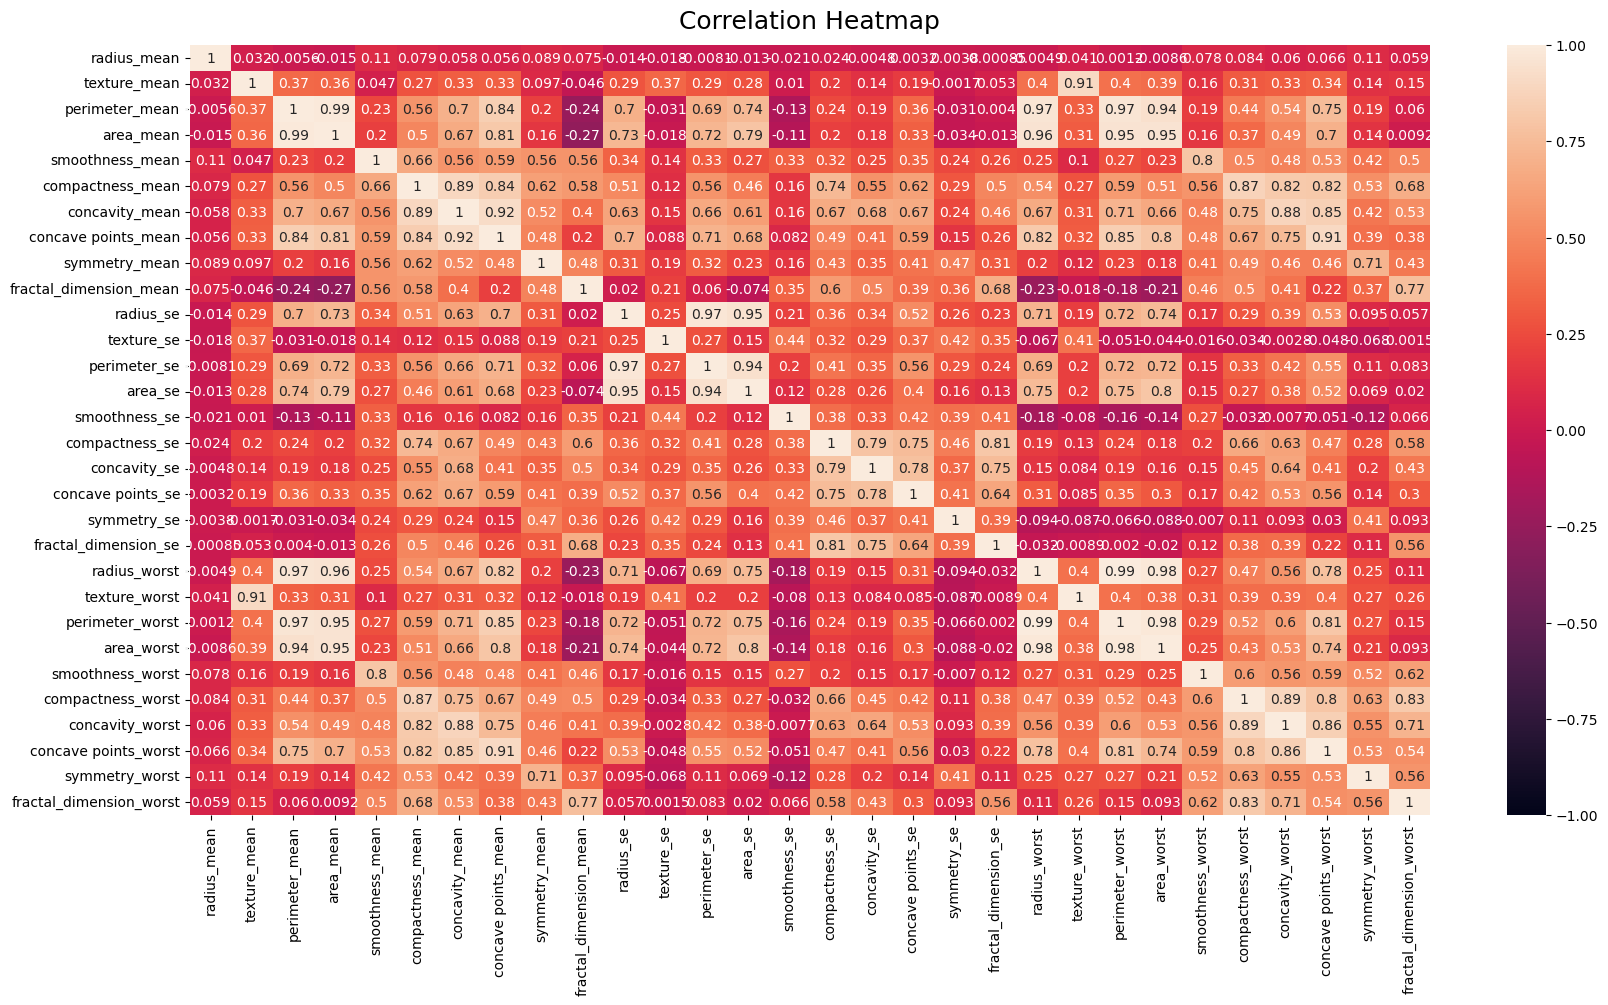

In [15]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

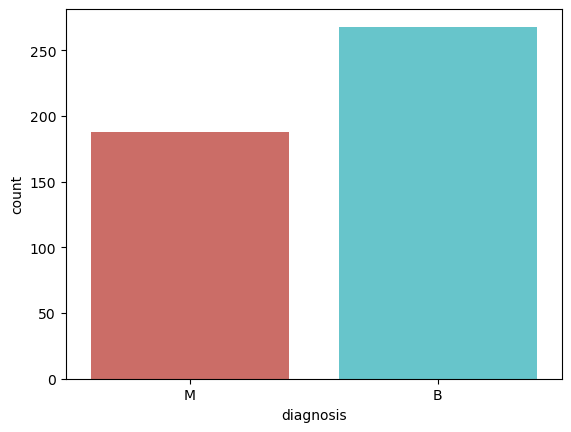

In [16]:
sns.countplot(x='diagnosis', data=df, palette='hls')
plt.show()


M (Malignant)
B (Benign)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [18]:
# make tpot
from tpot import TPOTClassifier
# svm with tpot template
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, template='LinearSVC')


/home/mamet/anaconda3/envs/ml/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [19]:
tpot.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.9687003968253969
                                                                              
Generation 2 - Current best internal CV score: 0.9687003968253969
                                                                              
Generation 3 - Current best internal CV score: 0.9687003968253969
                                                                              
Generation 4 - Current best internal CV score: 0.9687003968253969
                                                                              
Generation 5 - Current best internal CV score: 0.9687003968253969
                                                                              
Best pipeline: LinearSVC(input_matrix, C=0.01, dual=True, loss=hinge, penalty=l2, tol=0.0001)


TPOTClassifier(generations=5, population_size=50, random_state=42,
               template='LinearSVC', verbosity=2)

In [20]:
y_pred = tpot.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9927007299270073


In [21]:
# generate tpot to python
tpot.export('tpot_tubes1.py')

Text(50.722222222222214, 0.5, 'Original Class')

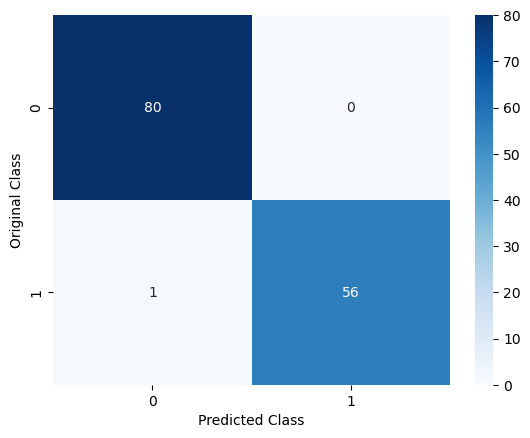

In [22]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')

### Testing

In [23]:
df_test = df_test.drop(['id'], axis=1)
df_test_SVC = df_test.copy()

In [24]:
df_test_scaled = x_scaler.transform(df_test)
test_pred_SVC = tpot.predict(df_test_scaled)

df_test_SVC['diagnosis'] = test_pred_SVC
df_test_SVC.to_csv('submission_SVC.csv', index=False)
df_test_SVC.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,0.05859,...,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863,B
1,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,0.05549,...,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925,B
2,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,0.06432,...,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490,B
3,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,0.06020,...,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174,B
4,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875,B


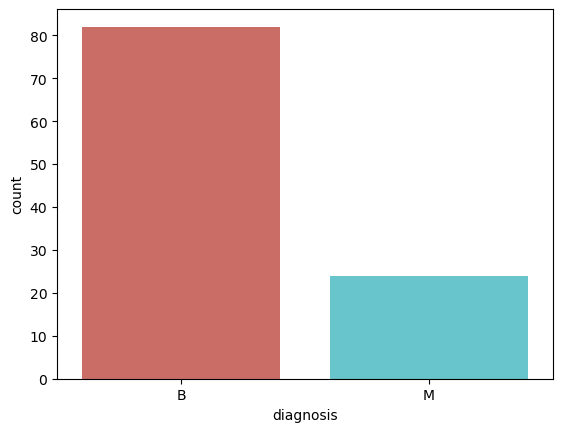

In [25]:
sns.countplot(x='diagnosis', data=df_test_SVC, palette='hls')
plt.show()
